# Halley comet motion

The motion of the Halley comet will be simulated. The comet orbits around the sun, which has mas $M = (1,998)10^30kg$. The distance between the comet and the sun is pointed as $\vec{r}$ and the gravitational constant $G = (6,674)10^{-11}\frac{m^3}{kgs^2}$. This settled, the equation of motion are

$$ \dot{r} = v \; \; \; \; \; \; \; \; \; \; \; \; \; \; \dot{v} = − \frac{GM}{|r|^3}r  $$

As unit of measure of length and time will be respectively assumed the major semi-major axes $ l_0 = 2.68 × 10^{12} $, and the period of revolution  $ t_0 = 75.32 y  = 2.38 × 10^9 s$. With this units,  $ GM = 4\pi^2 \simeq 39.48 $, while at the aphelion $ |r| = 1.97 $ and $ |v| = 0.816 $. The following code simulates the motion of the comet taking as starting point the aphelion. The time step and the number of revolution of the comet may be interactively choose, but with too little time steps or too many revolution the algorithm is time consuming and the results are not immediate. To solve numerically the equation of motion the velocity-Verlet algorithm has been implemented. This choice follows from the necessity of maintaining constant the values of the energy or the comet will wither depart from the sun or falling into it! Here the reader may find a confrontation with another methods for numerical solutions of differential equations (hosc harm). To check the conservation of energy it has been plotted. The presence of period spikes is due to the fast speed increase of the velocity of the comet near the aphelion. A possible improvement would be an adaptive step-size algorithm in which when the functions has strong variation the time step is reduced.

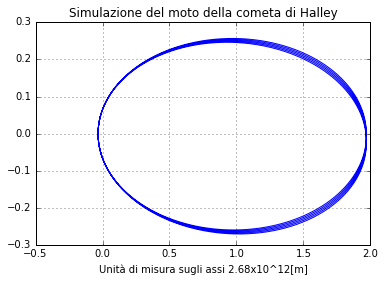

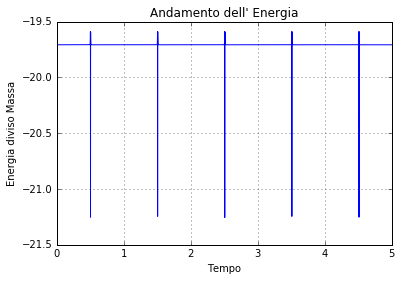

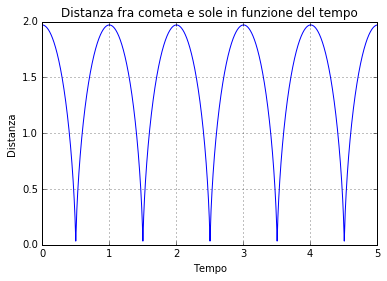

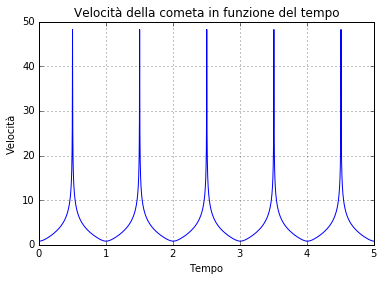

<function __main__.Halley_comet>

In [1]:
from math import sqrt,floor                            #Import methods and libriaries, show the plots in the notebook
from numpy import mean
from matplotlib.pyplot import *
from ipywidgets import interact
%matplotlib inline


def Halley_comet(h = pow(10, -4),N=5):
                                    
    L = h                                                    #Define a time vectors
    t = [0]

    GM = 39.48

    x = [1.97]                                                #Set initial condition
    y = [0]

    vx = [0]
    vy = [0.816]

    r = [sqrt(x[0] ** 2 + y[0] ** 2)]                          #Compute initial energy
    v = [sqrt(vx[0] ** 2 + vy[0] ** 2)]                  

    E = [-GM / r[0] + 0.5 * pow(v[0], 2)]

    Fx = [-GM*x[0]/r[0]**3]
    Fy = [-GM*y[0]/r[0]**3]

    for i in range(1, N*floor(1/h)):                                #Velocity-Verlet algorithm

        x.append(x[i-1]+vx[i-1]*h+0.5*Fx[i-1]*pow(h, 2))
        y.append(y[i-1]+vy[i-1]*h+0.5*Fy[i-1]*pow(h, 2))      #Compute positon at the i-th step

        r.append(sqrt(x[i]**2+y[i]**2))                       #Compute distance from the sun

        Fx.append(-GM*x[i]/r[i]**3)
        Fy.append(-GM*y[i]/r[i]**3)                           #Compute force at i-th step

        vx.append(vx[i-1]+0.5*(Fx[i-1]+Fx[i])*h)
        vy.append(vy[i-1]+0.5*(Fy[i-1]+Fy[i])*h)              #Compute velocity at i-th step

        v.append(sqrt(vx[i]**2+vy[i]**2))                    

        E.append(-GM / r[i] + 0.5 * pow(v[i], 2))             #Compute energy (divided bi the come mass) at the i-th steè

        t.append(L)
        L += h                                                #Make the time vector advance

#Plot the relusts
    
    figure()                                              
    plot(x, y)
    title("Simulazione del moto della cometa di Halley") 
    xlabel("Unità di misura sugli assi 2.68x10^12[m]")
    grid()

    figure()
    plot(t, E)
    title("Andamento dell' Energia")
    xlabel("Tempo")
    ylabel("Energia diviso Massa")
    grid()

    figure()
    plot(t,r)
    title("Distanza fra cometa e sole in funzione del tempo")
    xlabel("Tempo")
    ylabel("Distanza")
    grid()

    figure()
    plot(t,v)
    title("Velocità della cometa in funzione del tempo")
    xlabel("Tempo")
    ylabel("Velocità")
    grid()

    show()
    
interact (Halley_comet, h = (pow(10, -6), pow(10, -4),pow(10, -11)), N = (1, 10, 1))    

The orbit is not perfectly periodic, this is due to computation errors. As the time interval decreases, the computed solutions approaches the analytical one.